# Members of the group
Guilherme Werneck de Oliveira - 12054632

Jiang Zhi - 9778706

Caio Andrade - 9797232

Tiago Bomventi - 3690177

Ricardo Mikio Morita - 5412562

# Dataset

## Name of the dataset
Dataset: Video Game Sales

## Abstract
The video game sales dataset contains data about the release of games between 2004 and 2012 with information about the publishers, game sales around the world, genre, ESRB rating and game score (user and critic).

## Questions to the dataset

These question is from the last assignment.

Question 1: Year of release X genre: How was the evolution of each genre over time?

Question 2: What is the relationship between critical scores versus users versus sales? Did more popular games score higher than users or critics?

Question 3: How is the sale of different regions of the planet by game genre?

Question 4: What is the relationship between game evaluation and game sales?

Question 5: Which games have been the most sold in the context of quarantine?


In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from cycler import cycler

In [34]:
gdata = pd.read_csv("https://raw.githubusercontent.com/wtamu-cisresearch/scraper/master/gamedata-20140215-11_53_10.csv", skiprows=1)

# converting 'user score' to float
gdata['user score (float)'] = pd.to_numeric(gdata['user score'], errors = 'coerce')
# converting 'release date' to datetime
gdata['release date (datetime)'] = pd.to_datetime(gdata['release date'], format='%b %d, %Y', errors = 'coerce')

#### Question 1: Year of release X genre: How was the evolution of each genre over time?

Game's releases start to grow from 2006. All genres seem to reach their maximum releases between the years 2009 and 2011. Exception for the action genre. It reached the highest releases numbers in 2012 and is characterized as the genre with the highest peak. After 2012 releases the pattern change and realeases numbers starts to fall.

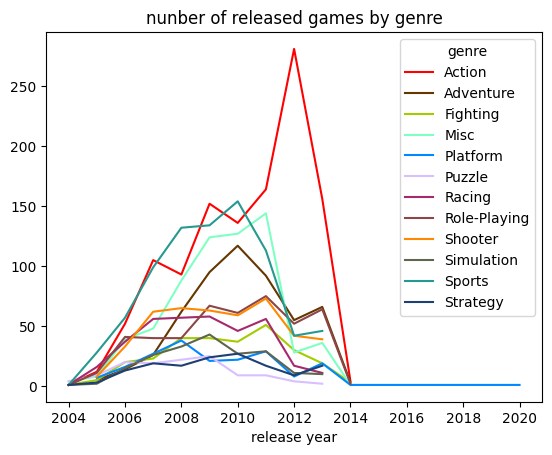

In [35]:
#redefining palette color to avoid same color in the legend
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']
#setting prop cycle on default rc parameter
plt.rc( 'axes', prop_cycle = ( cycler( 'color', palette ) ) )

gdata.groupby(['release year', 'genre'])['global sales'].count().unstack().plot(title='nunber of released games by genre')

#restoring default
mpl.rcParams.update(mpl.rcParamsDefault)

#### Question 2: What is the relationship between critical scores versus users versus sales? Did more popular games score higher than users or critics?

Looking at the scatter matrix. Critical score and user score seem to have a positive linear relationship.

Scores also seem to affect sales (in general). Biggests sales numbers are concentrated with high critic scores and user scores. 

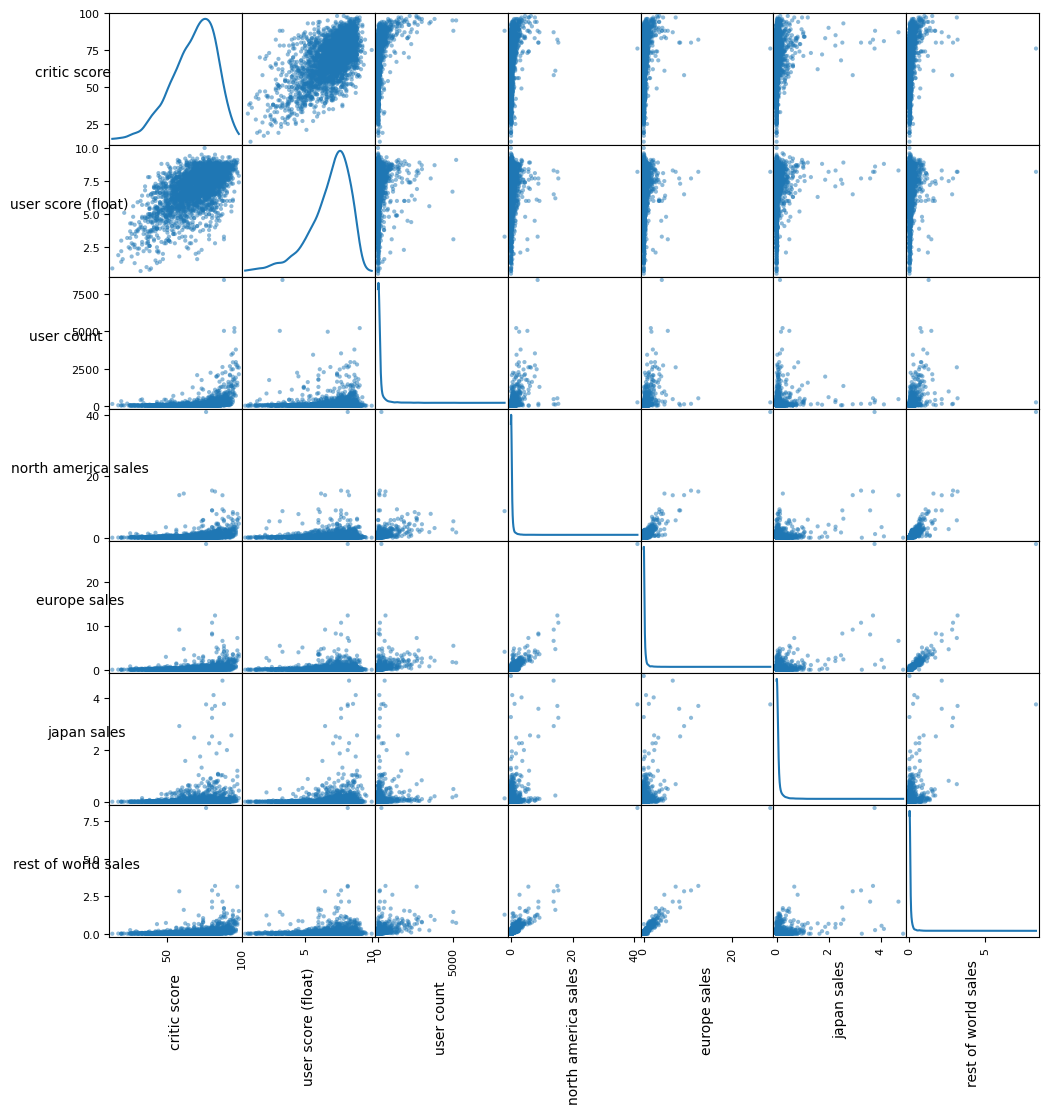

In [36]:
scatter_matrix = pd.plotting.scatter_matrix(
    gdata[['critic score', 'user score (float)', 'user count',
           'north america sales', 'europe sales', 
           'japan sales', 'rest of world sales']],
    figsize  = [12, 12],
    marker   = ".",
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

#### Question 3: How is the sale of different regions of the planet by game genre?

North america sales dominate in all genres, follow by europe sales. Japan sales have similar numbers with rest of world sales, except for racing, shooter, role-playing. Japan sales are high in relation to others sales in role-playing genre and are low in shooter genre.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


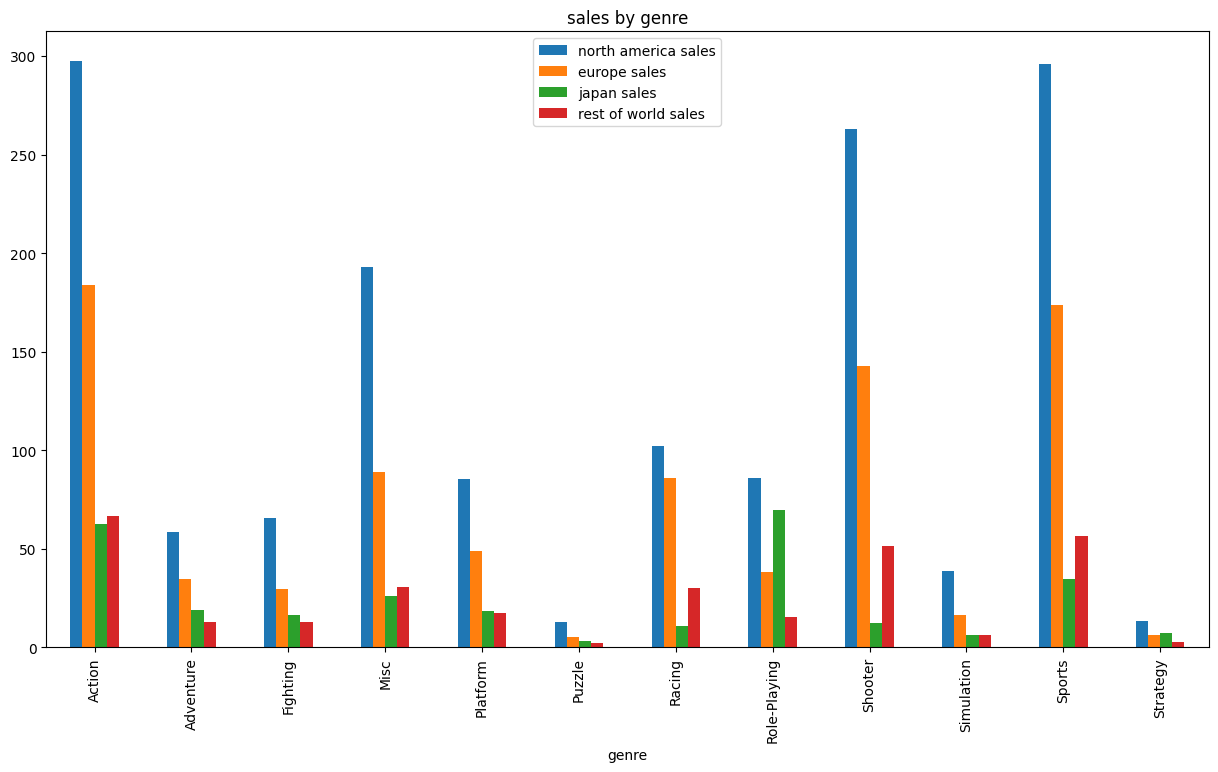

In [37]:
fig = plt.figure(figsize = (15, 8))
ax = fig.gca()
gdata.groupby(['genre'])['north america sales', 'europe sales', 'japan sales', 'rest of world sales'].sum().plot(kind="bar", title='sales by genre', ax = ax)


#### Question 4: What is the relationship between game evaluation and game sales?

When the game is good rated, can be that not to many people know about the game.

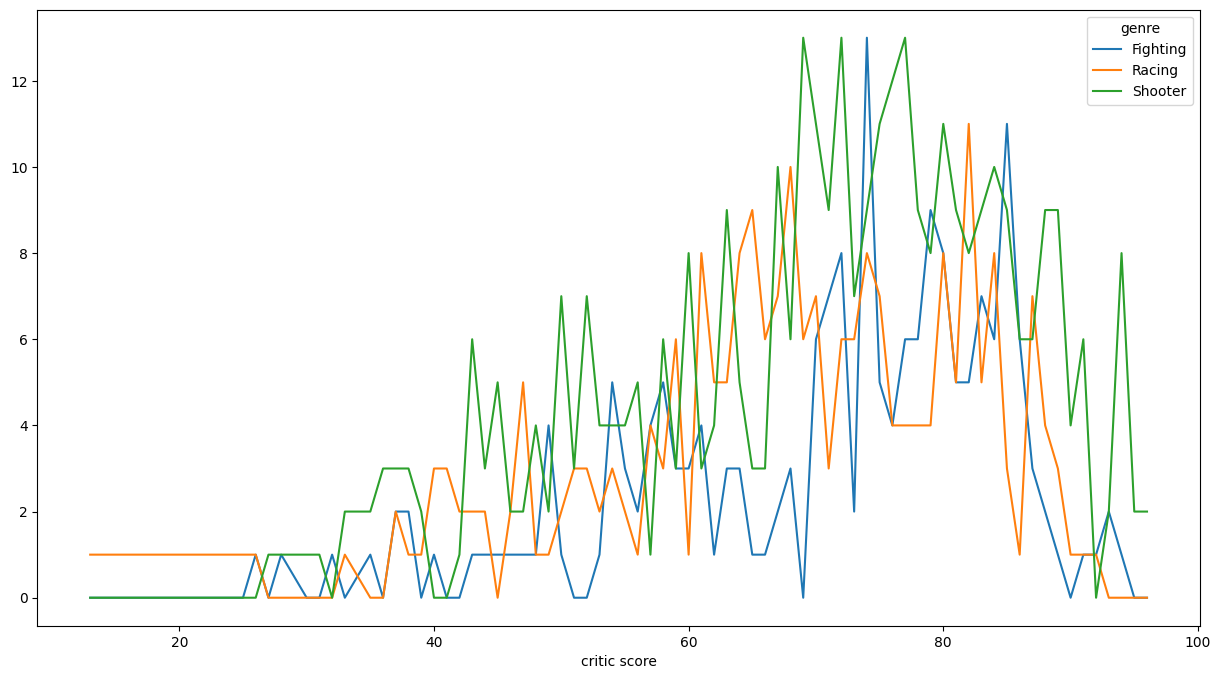

In [38]:
fig = plt.figure(figsize = (15, 8))
ax = fig.gca()
genre_gdata = gdata[gdata['genre'].isin(["Racing", "Fighting", "Shooter"])]
genre_gdata.groupby(['critic score', 'genre'])['global sales'].count().unstack(fill_value=0).plot(ax = ax)

#### Question 5: Which games have been the most sold in the context of quarantine?


The dataset have information from the year 2004 to year 2012, so we can't relate the information with the context of quarantine, the timeline is different. We can try these with some old diseases, but at that time the quarantine don't exist, maybe there is a relation as people stay at home. In 2009-2010 the H1N1 Swine Flu happened.

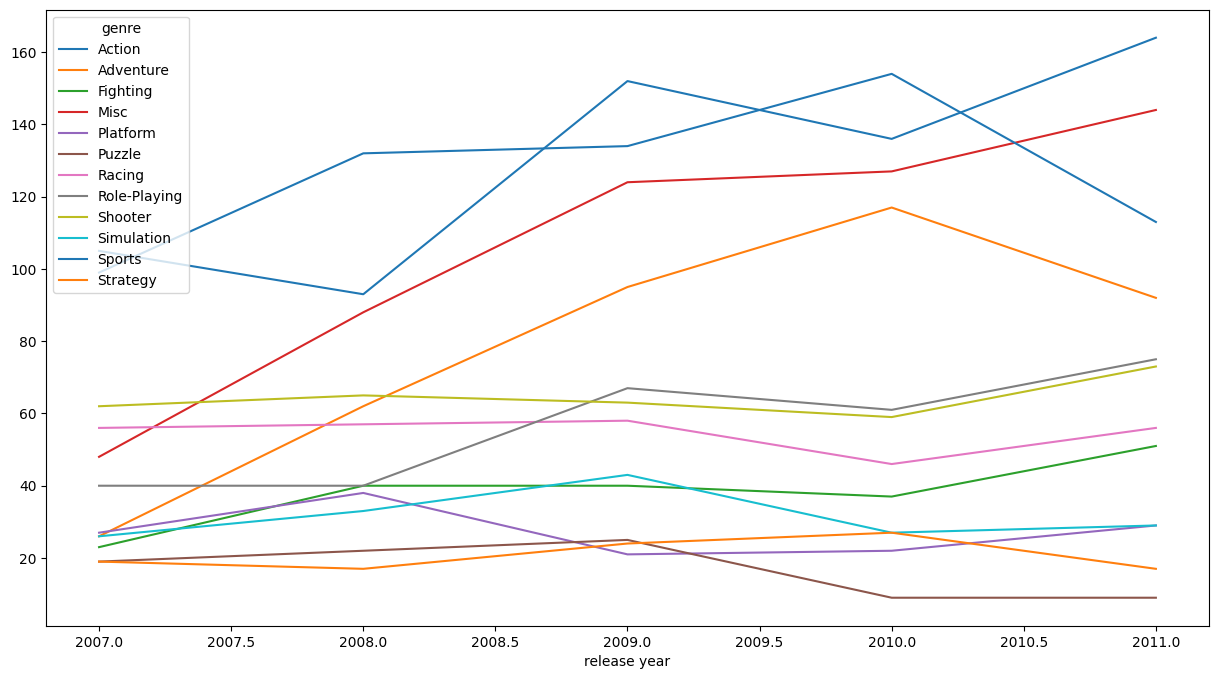

In [39]:
fig = plt.figure(figsize = (15, 8))
ax = fig.gca()
genre_gdata = gdata[gdata['release year'].isin(["2007", "2008", "2009", "2010", "2011"])]
genre_gdata.groupby(['release year', 'genre'])['global sales'].count().unstack().plot(ax = ax)

## EDA
Present your EDA strategy:
 - Discover more about the variable's statistical distributions. Is gaussian or not? Is simetrical or not? With outliers or not?
 - Try two find relations between variables
 - Look for independent variables, try to find the important variables 

The strategy for EDA exploration will be test
 - descritive statistics, line plots, histograms, box-plots, scatter-plots


## Some examples of analysis/visualizations:

In [40]:
gdata.info()
# number of null
gdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5441 entries, 0 to 5440
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     5441 non-null   object        
 1   platform                 5441 non-null   object        
 2   release year             5322 non-null   float64       
 3   genre                    5441 non-null   object        
 4   publisher                5431 non-null   object        
 5   north america sales      5441 non-null   float64       
 6   europe sales             5441 non-null   float64       
 7   japan sales              5441 non-null   float64       
 8   rest of world sales      5441 non-null   float64       
 9   global sales             5441 non-null   float64       
 10  release date             3736 non-null   object        
 11  critic score             3000 non-null   float64       
 12  critic outof             3000 non-

name                          0
platform                      0
release year                119
genre                         0
publisher                    10
north america sales           0
europe sales                  0
japan sales                   0
rest of world sales           0
global sales                  0
release date               1705
critic score               2441
critic outof               2441
critic count               2441
user score                 1764
user count                 2635
developer                  1727
rating                     1777
user score (float)         2635
release date (datetime)    1754
dtype: int64

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

In [41]:
gdata.describe()

release year  north america sales  ...   user count  user score (float)
count   5322.000000          5441.000000  ...  2806.000000         2806.000000
mean    2009.543968             0.277817  ...   121.135424            6.870385
std        2.141236             0.931991  ...   376.859020            1.513319
min     2004.000000             0.000000  ...     4.000000            0.500000
25%     2008.000000             0.000000  ...    12.000000            6.100000
50%     2010.000000             0.090000  ...    26.000000            7.200000
75%     2011.000000             0.240000  ...    79.000000            8.000000
max     2020.000000            41.020000  ...  8457.000000           10.000000

[8 rows x 11 columns]

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

The dataset was divided as these four different types for better analysis: 
 1. sales data (sales_data): sales related data
 2. score data (score_data): score or critic related data
 3. categorical data (categorical_data): non-numeric data
 4. time data (time_data): related with time

In [42]:
sales_data = gdata[['north america sales', 'europe sales', 'japan sales', 'rest of world sales']]
score_data = gdata[['critic score', 'critic outof', 'critic count', 'user score (float)', 'user count']]
categorical_data = gdata[['platform', 'genre', 'publisher', 'developer', 'rating']]

#### Sales data

Sales data are dominated by outliers. Look at the mean and standard deviation from describe command. In "north america sales" the max value is  located forty standard deviation from the mean. Definitely sales do not follow a Gaussian distribution.

Last graph, is a boxplot without outliers. We can see that most symmetric distribuition is North America Sales (median and quartile positions). The others are much less symmetrical.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


north america sales  europe sales  japan sales  rest of world sales
count          5441.000000   5441.000000  5441.000000          5441.000000
mean              0.277817      0.157142     0.052636             0.055894
std               0.931991      0.630900     0.222561             0.195611
min               0.000000      0.000000     0.000000             0.000000
25%               0.000000      0.000000     0.000000             0.000000
50%               0.090000      0.010000     0.000000             0.010000
75%               0.240000      0.120000     0.030000             0.040000
max              41.020000     28.660000     4.870000             8.390000

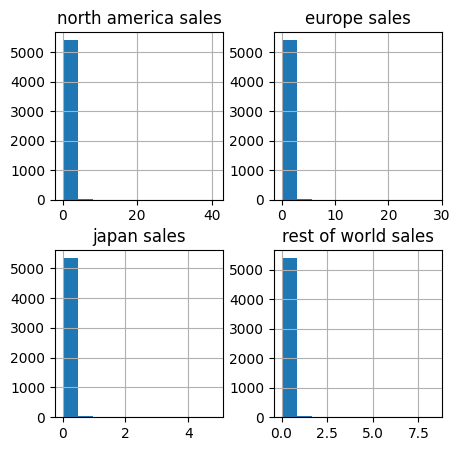

In [43]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
sales_data.hist(ax = ax)

sales_data.describe()

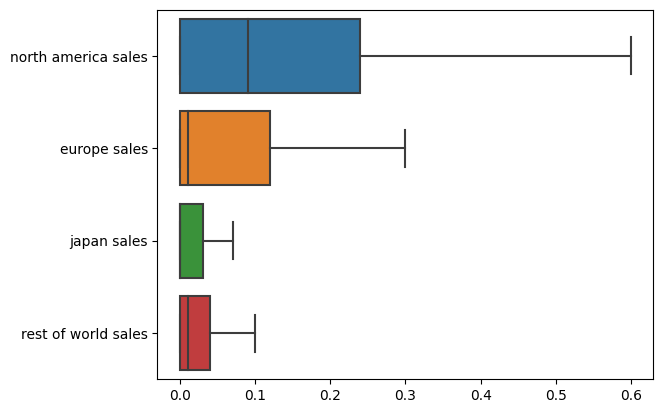

In [44]:
sns.boxplot(data=sales_data, orient="h", showfliers=False)

#### Score Data

All distributions appear to be asymmetrical, that can be see through the box plot (without outliers).

The "user count" variable does not seem to follow a Gaussian distribution, as the maximum is dozens of standard deviations from the mean. A lot of outliers.

Variables "user score" and "critical score" seem to have a similar distribution. Are they related?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


critic score  critic outof  ...  user score (float)   user count
count   3000.000000        3000.0  ...         2806.000000  2806.000000
mean      67.782667         100.0  ...            6.870385   121.135424
std       14.403006           0.0  ...            1.513319   376.859020
min       13.000000         100.0  ...            0.500000     4.000000
25%       59.000000         100.0  ...            6.100000    12.000000
50%       70.000000         100.0  ...            7.200000    26.000000
75%       79.000000         100.0  ...            8.000000    79.000000
max       98.000000         100.0  ...           10.000000  8457.000000

[8 rows x 5 columns]

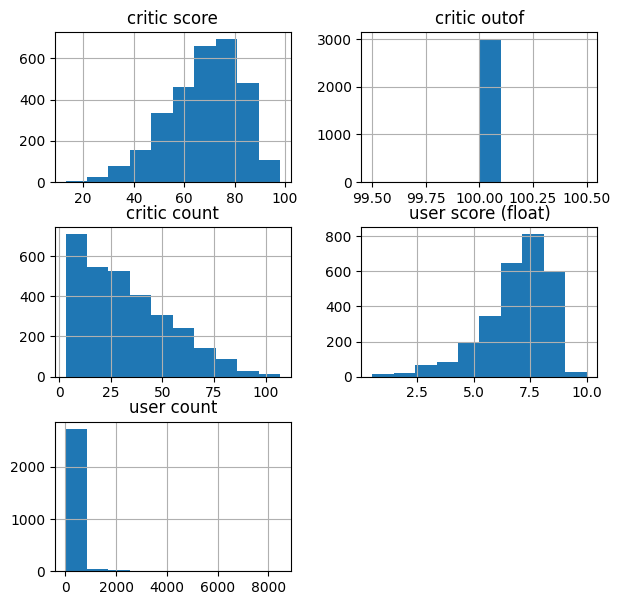

In [45]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
score_data.hist(ax = ax)

score_data.describe()

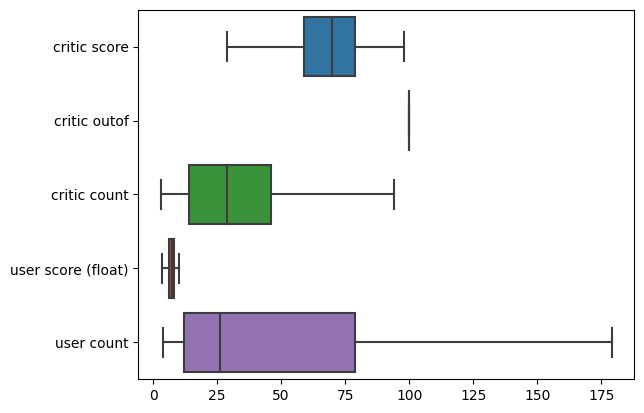

In [46]:
sns.boxplot(data=score_data, orient="h", showfliers=False)

#### Categorical Data 

The most popular rating is E, for Everyone, followed by T, for Teens. This was to be expected, as is the distribution of game genres, with Action games on the lead, followed by sports.

In [47]:
categorical_data.describe(include='all')

platform   genre        publisher developer rating
count      5441    5441             5431      3714   3664
unique        9      12              244       863      6
top         Wii  Action  Electronic Arts   Ubisoft      E
freq       1338    1179              471        98   1218

Games released grouped by genre:

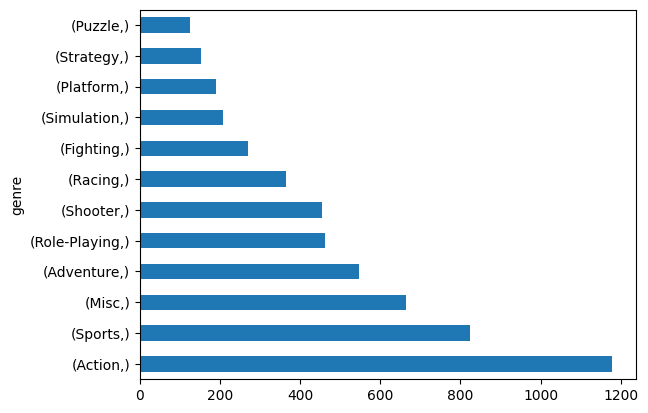

In [48]:
categorical_data[["genre"]].value_counts().plot(kind="barh")

Games released grouped by publisher:

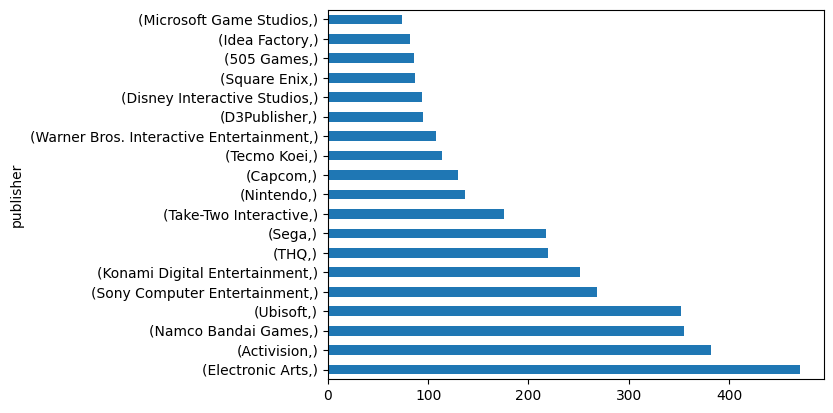

In [49]:
categorical_data[["publisher"]].value_counts().head(19).plot(kind="barh")

Games released grouped by ESRB rating:

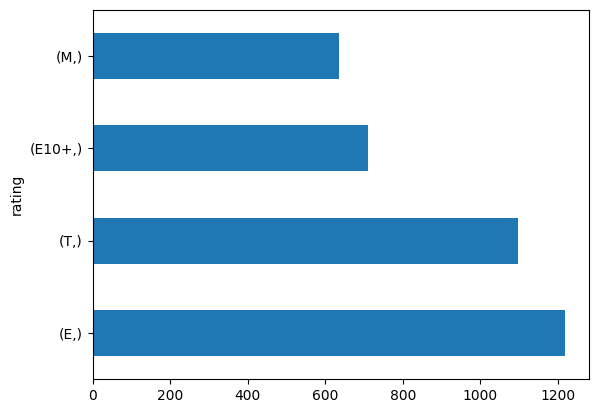

In [50]:
categorical_data[["rating"]].value_counts().head(4).plot(kind="barh")

Games released by Nintendo with E rating

In [51]:
nintendo_genre = categorical_data[(categorical_data["rating"]== 'E') &
                 (categorical_data["publisher"]== 'Nintendo')
                 ]

nintendo_genre[['publisher']].value_counts()

publisher
Nintendo     53
dtype: int64

In [52]:
E_rating = categorical_data['rating'] == 'E'
publisher = categorical_data['publisher'].isin(["Nintendo","Ubisoft"]) 

categorical_data[E_rating & publisher].describe()


platform genre publisher developer rating
count       136   136       136       136    136
unique        7    10         2        55      1
top         Wii  Misc   Ubisoft   Ubisoft      E
freq         77    36        83        31    136

#### Time Data

Most years had one or more releases that sold much more than its other contemporaries. These outliers were a common presence, though the reason why is not entirely clear at first glance.

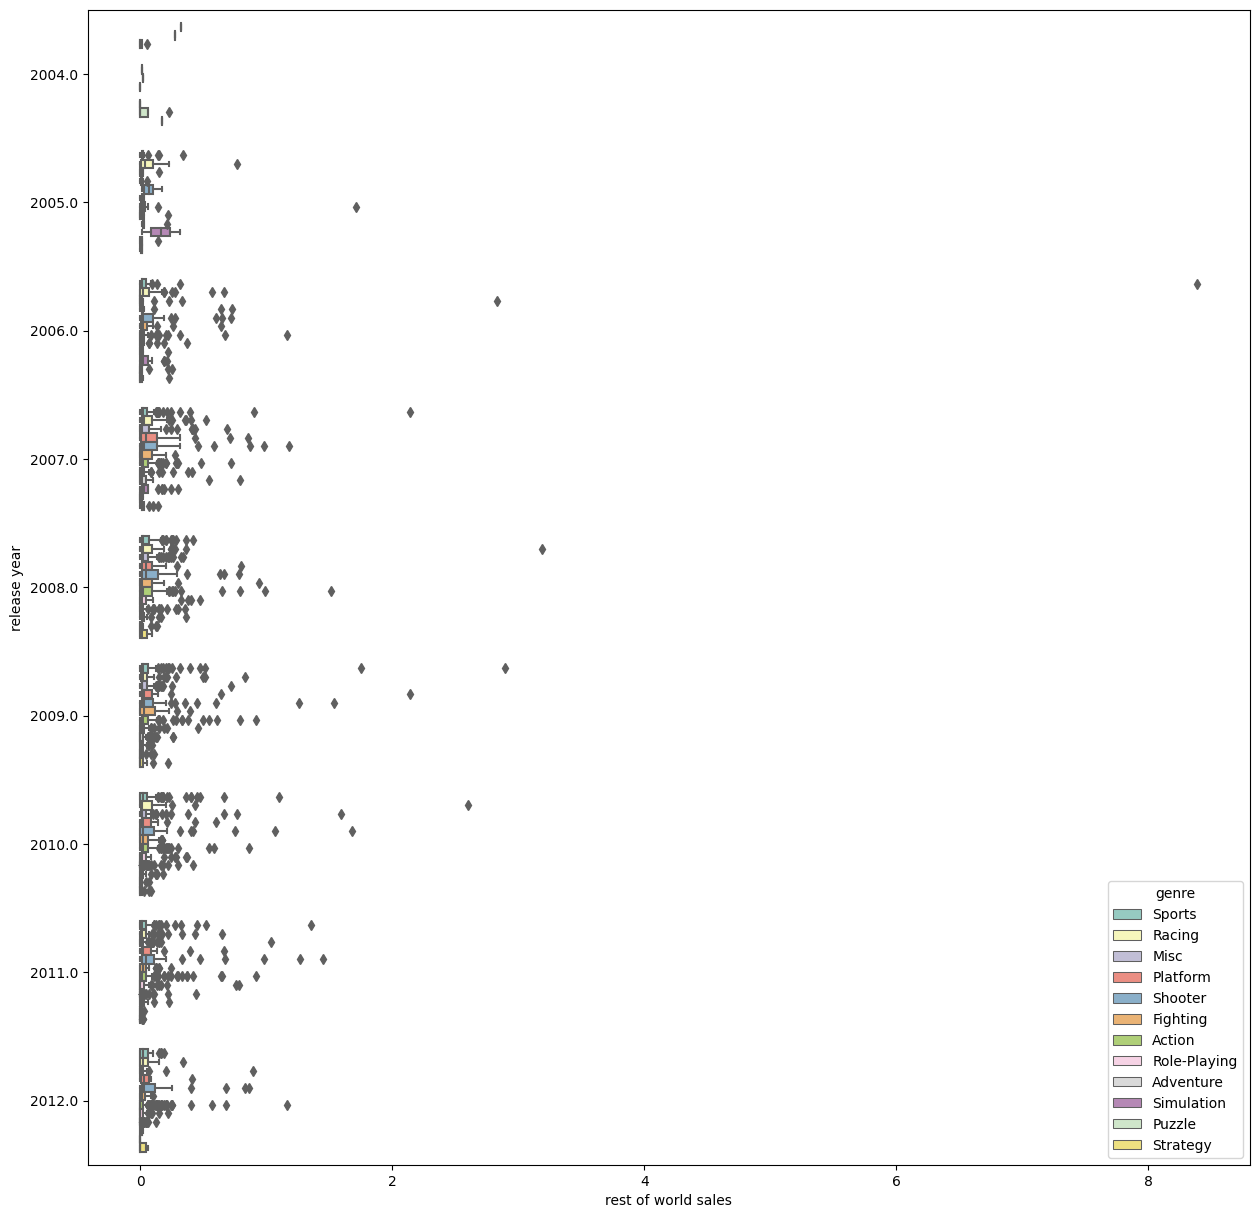

In [53]:
sales_data = gdata[['release year', 'rest of world sales', 'genre']]
#sales_data = sales_data[sales_data['genre'].isin(["Racing", "Fighting"])]
sales_data = sales_data[sales_data['release year'].isin(range(2004, 2013, 1))]
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.boxplot(x = "rest of world sales", y = "release year", data=sales_data, orient="h", palette="Set3", hue="genre", ax = ax)

#### Scatter Matrix

Two relations are clearly noticeable with the scatter matrix.

Sales in the rest of the world have a positive correlation with sales in Europe and North America, but not with Japan. Would the Japanese market have its own dynamics?

"user score" and "critic score" appear to have a positive correlation. Their variations are consistent. It is natural, since the critic's rating usually reflects the rating of the users.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 100.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 100.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 100.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 100.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/panda

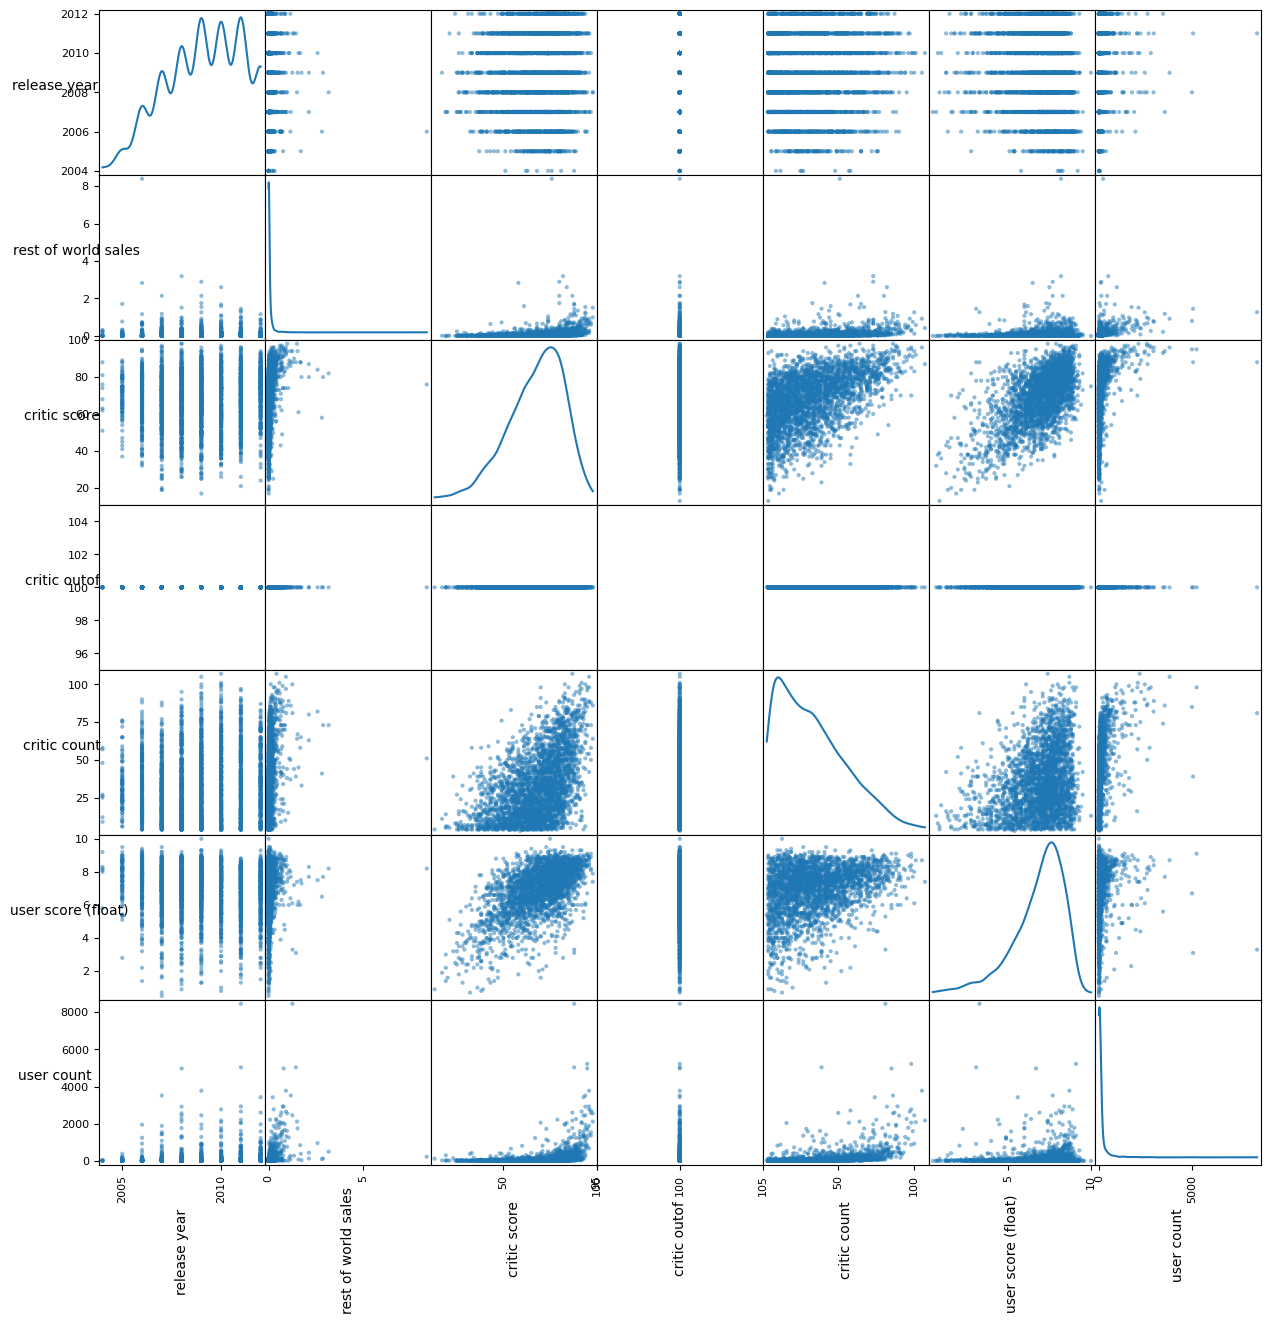

In [54]:
numeric_data = pd.concat([sales_data, score_data], axis=1)

scatter_matrix = pd.plotting.scatter_matrix(
    numeric_data,
    figsize  = [15, 15],
    marker   = ".",
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

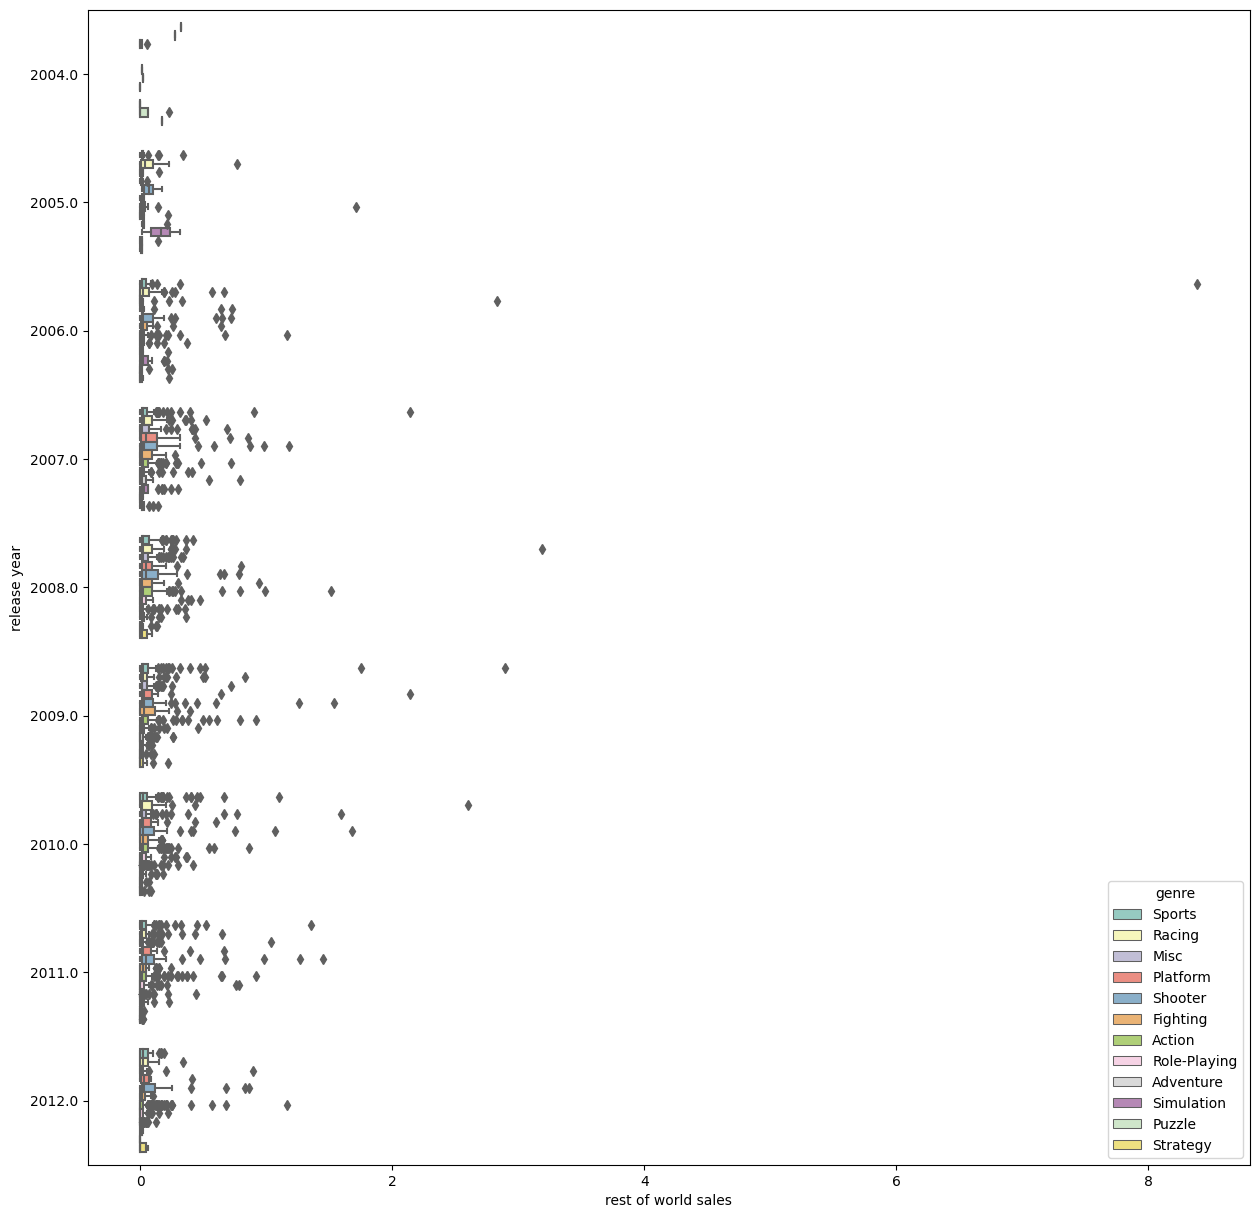

In [55]:
_data = gdata[['release year', 'rest of world sales','genre']]
#sales_data = sales_data[sales_data['genre'].isin(["Racing", "Fighting"])]
_data = _data[_data['release year'].isin(range(2004, 2013, 1))]
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.boxplot(x = "rest of world sales", y = "release year", data=_data, orient="h", palette="Set3", hue="genre", ax = ax)

4) Is there any outlier's pattern? 

As previously mentioned, there area a number of variables that had one or more outliers. Most proeminent variables are showed in the below box-plot graph.

All points beyond the box plot whiskers can be considered outliers because they are positioned quite far from the center of the distribution.

Look at "user count" variable. Their outliers are so far from de center of the box-plot that we can barely see the graph.

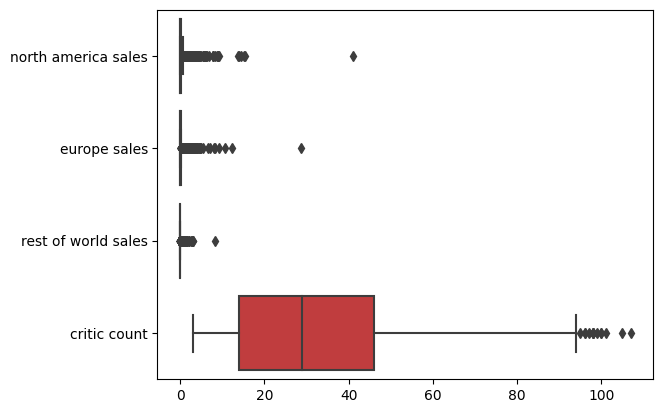

In [62]:
sales_data = gdata[['north america sales', 'europe sales', 'japan sales', 'rest of world sales']]
numeric_data = pd.concat([sales_data, score_data], axis=1)
sns.boxplot(data=numeric_data[['north america sales', 
                              'europe sales', 
                              'rest of world sales', 
                               'critic count']], orient="h")

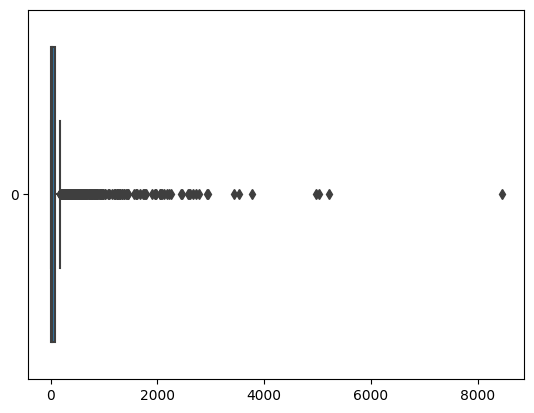

In [63]:
sns.boxplot(data=numeric_data['user count'], orient="h")

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

The dataset contains some variables that apparently do not follow a Gaussian distribution. Sales and "user count" seem to follow a power law. Power laws are common in situations characterized as "the winner takes all". This is in line with the sales phenomenon where a highly successful game often sells much times more than the average game. Therefore, outliers would be the best sellers games.

The same can be said of "user count". The number of players of a successful game is much greater (in various orders of magnitude) than an average game.

Both are not gaussian phenomenon.

About 25% of all games sold worldwide pertained to North America, followed by Europe, Japan and the rest of the World.

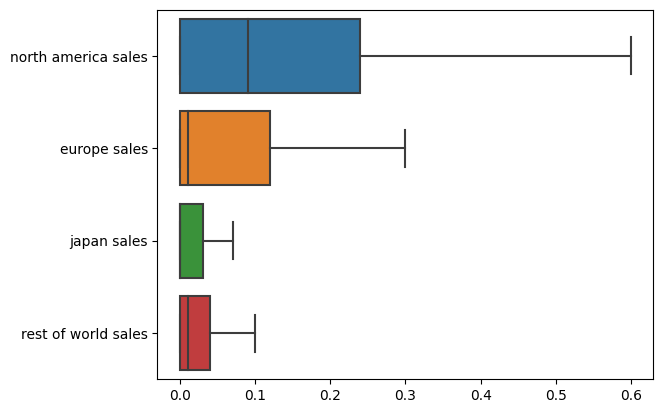

In [61]:
sales_data = gdata[['north america sales', 'europe sales', 'japan sales', 'rest of world sales']]
sns.boxplot(data=sales_data, orient="h", showfliers=False)

Overall, the user score and critic score resembled each other for the most part.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


critic score          67.782667
user score (float)     6.870385
dtype: float64

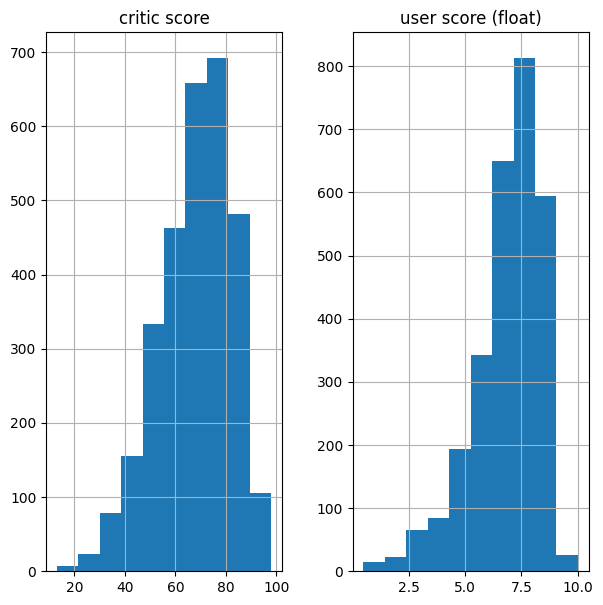

In [60]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
score_data[["critic score","user score (float)"]].hist(ax = ax)

score_data[["critic score","user score (float)"]].mean()

There's a bias to release action-driven games, while puzzle and strategy games have less representation.

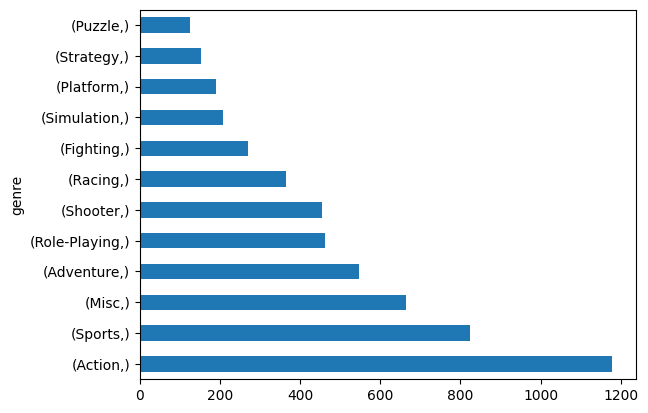

In [64]:
categorical_data[["genre"]].value_counts().plot(kind="barh")

Observing the distribution of games by rating, which when associated with the previous plot, we can assume that developers and publishers favor games that would be more attractive to a younger public.

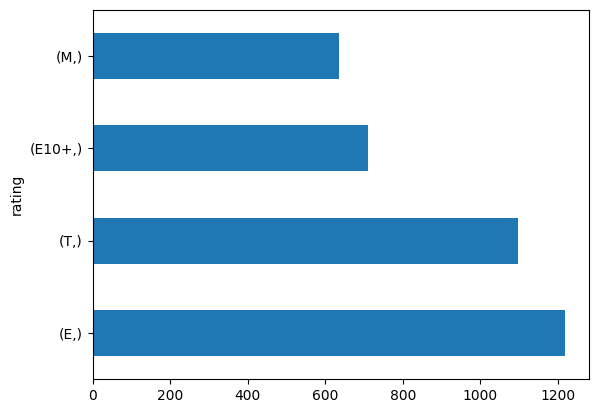

In [65]:
categorical_data[["rating"]].value_counts().head(4).plot(kind="barh")

6) Is there any symmetry that can be stressed?

Yes, because the medians of the attributes: north america sales, criticism score and critic count are very close to the averages, as illustrated in the graphs below:

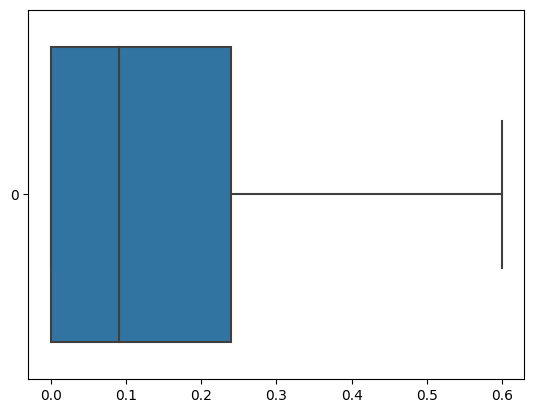

In [66]:
sns.boxplot(data=gdata["north america sales"], orient="h", showfliers=False)

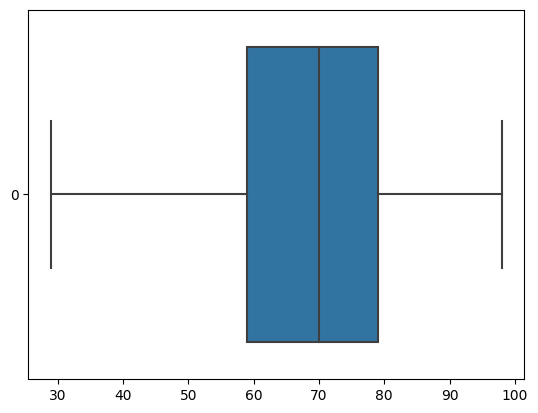

In [67]:
sns.boxplot(data=gdata["critic score"], orient="h", showfliers=False)

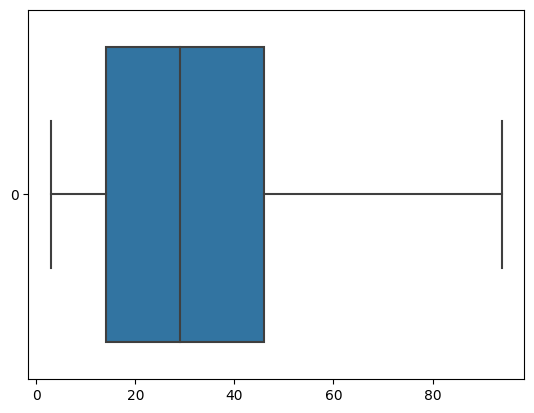

In [68]:

sns.boxplot(data=gdata["critic count"], orient="h", showfliers=False)

7) How important was EDA to help you understand the dataset?

The importance of an EDA is to make easy visualize the data and understand the relationships and patterns between the attributes of the dataset.

At first glance the data doesn't mean anything, after we study more, we could discern and categorize various other interesting characteristics.

It also allow us to extract characteristics related to behaviors, through statistics.